# Imports

In [2]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [3]:
# display related imports
from IPython.display import display, Image, clear_output, HTML, IFrame

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# to save dataframe as an image
import dataframe_image as dfi

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Load From Pickle

In [4]:
cat_data = pd.read_pickle('data/cat_data.pkl')

In [5]:
accepted = pd.read_pickle('data/accepted_rem_na.pkl')

In [62]:
col_accep = pd.read_pickle('data/col_accep.pkl')

# Lending Club Deals

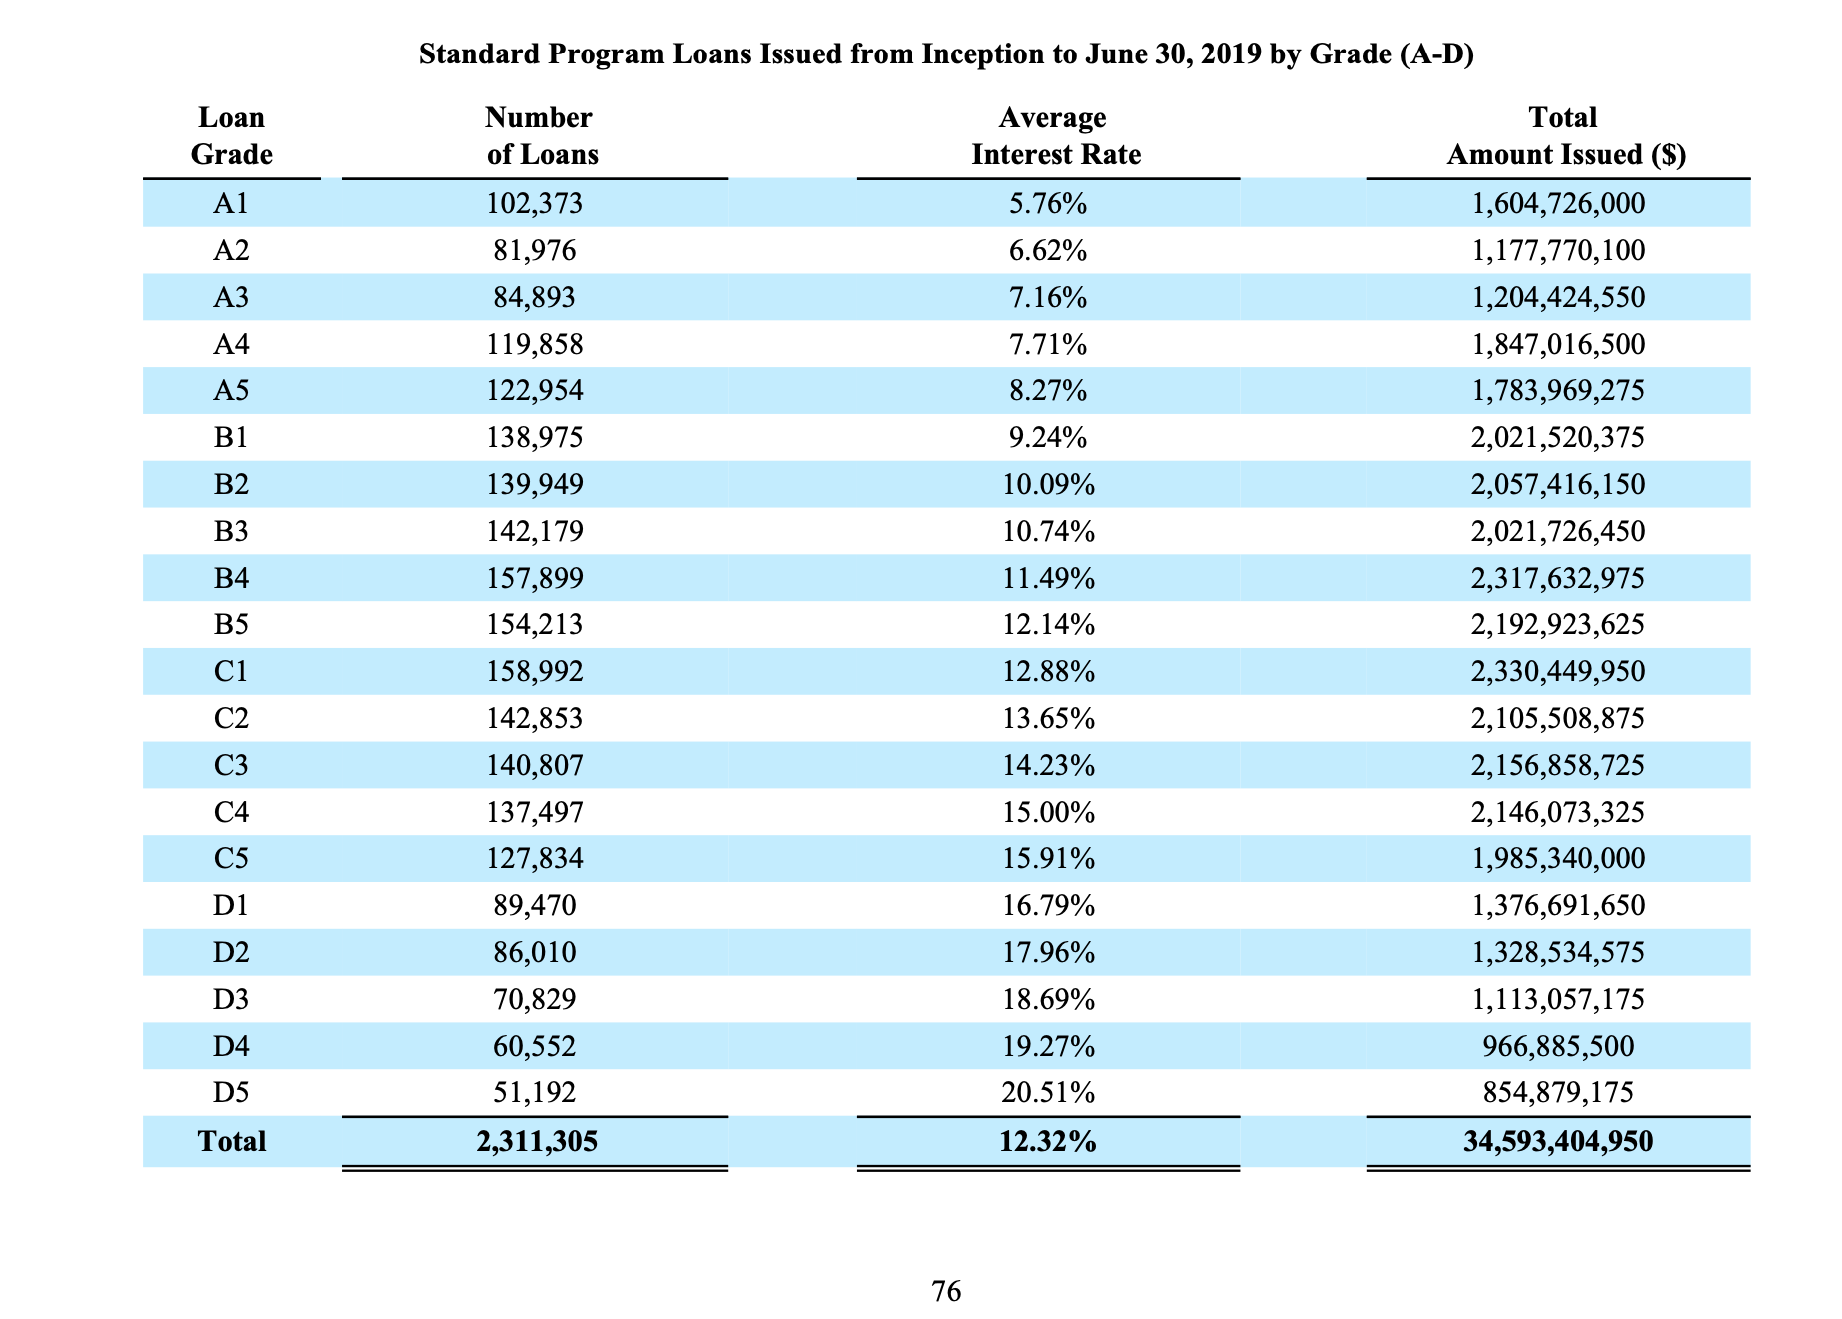

In [6]:
Image('lending_club_deals.png')

Dropdown(description='Category:', options=('term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'veri…

               loan_amnt           int_rate         
                     sum      mean     mean    count
term                                                
 36 months  2.051716e+10  12745.53    11.95  1609754
 60 months  1.349895e+10  20738.46    15.92   650914


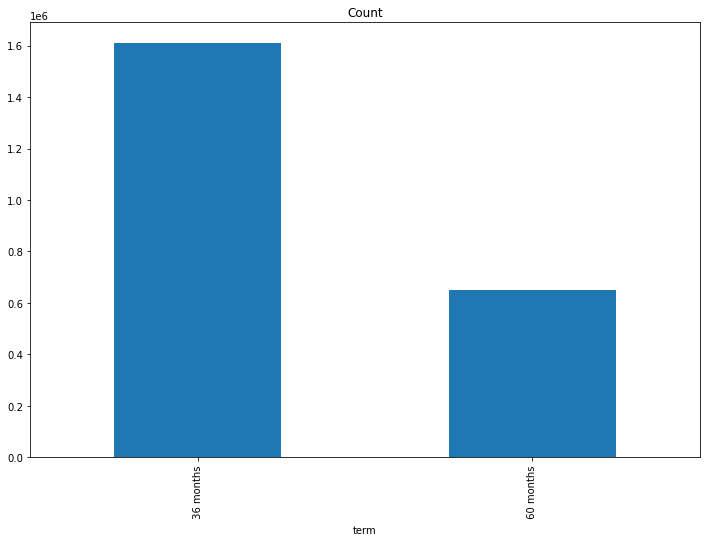

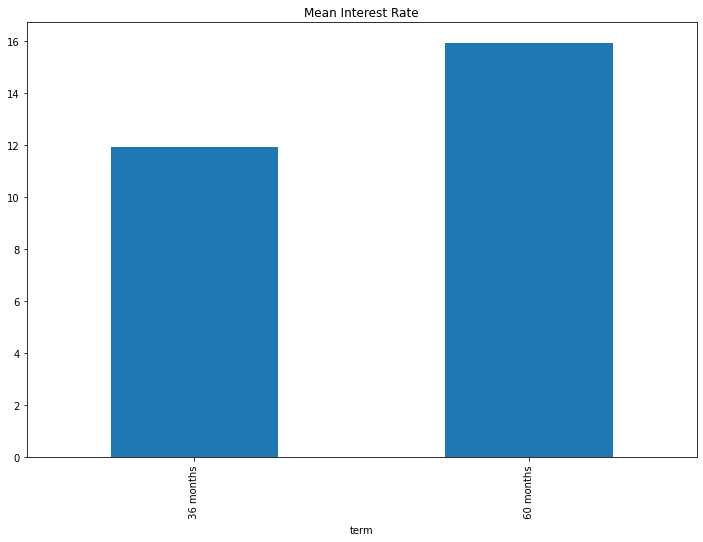

In [30]:
# drop down and bar plots based on category info

w_plot = widgets.Dropdown(
    options=cat_data,
    value='term',
    description='Category:',
    disabled=False,
)
fig = plt.pyplot.figure()
display(w_plot)

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w_plot)
        accepted[[change['new'], 'int_rate']].groupby(change['new']).count().plot.bar(figsize=(12,8), 
                                                                                      title='Count',
                                                                                     legend=False)
        accepted[[change['new'], 'int_rate']].groupby(change['new']).mean().plot.bar(figsize=(12,8),
                                                                                     legend=False,
                                                                                     title='Mean Interest Rate')
        print(accepted.groupby(change['new']).agg({'loan_amnt': (['sum', 'mean']),
                                      'int_rate': (['mean', 'count'])}).round(2))
        
w_plot.observe(on_change)  

In [31]:
for col_ in cat_data:
    print('*'*100)
    print(col_)
    print(accepted.groupby([col_]).agg({'loan_amnt': (['sum', 'mean']),
                                      'int_rate': (['mean', 'count'])}).round(2))

****************************************************************************************************
term
               loan_amnt           int_rate         
                     sum      mean     mean    count
term                                                
 36 months  2.051716e+10  12745.53    11.95  1609754
 60 months  1.349895e+10  20738.46    15.92   650914
****************************************************************************************************
grade
          loan_amnt           int_rate        
                sum      mean     mean   count
grade                                         
A      6.323642e+09  14603.34     7.08  433027
B      9.404818e+09  14173.34    10.68  663557
C      9.775551e+09  15038.08    14.14  650053
D      5.097344e+09  15711.98    18.14  324424
E      2.367318e+09  17453.08    21.83  135639
F      7.994102e+08  19124.65    25.45   41800
G      2.480324e+08  20383.99    28.07   12168
****************************************************

                loan_amnt           int_rate         
                      sum      mean     mean    count
delinq_2yrs                                          
0.0          2.768761e+10  15054.91    12.94  1839108
1.0          4.253865e+09  15119.32    13.64   281353
2.0          1.222276e+09  15036.17    13.94    81289
3.0          4.361740e+08  14764.54    14.06    29542
4.0          1.904081e+08  14447.84    14.15    13179
5.0          9.429342e+07  14289.05    14.18     6599
6.0          5.167285e+07  13901.76    14.19     3717
7.0          2.888612e+07  14008.79    14.21     2062
8.0          1.661405e+07  13584.67    14.09     1223
9.0          1.094865e+07  13384.66    14.40      818
10.0         7.310300e+06  13148.02    14.04      556
11.0         4.812850e+06  13258.54    14.61      363
12.0         3.653075e+06  13890.02    14.83      263
13.0         2.150375e+06  13032.58    13.87      165
14.0         1.581800e+06  13181.67    14.66      120
15.0         1.150850e+06  1

                               loan_amnt           int_rate         
                                     sum      mean     mean    count
collections_12_mths_ex_med                                          
0.0                         3.351456e+10  15075.70    13.08  2223085
1.0                         4.639946e+08  13377.77    13.82    34684
2.0                         3.072025e+07  13281.56    13.91     2313
3.0                         3.569075e+06  13170.02    14.12      271
4.0                         1.319700e+06  14190.32    14.36       93
5.0                         4.884500e+05  13568.06    12.39       36
6.0                         2.899000e+05  17052.94    14.07       17
7.0                         1.080750e+05  15439.29    13.29        7
8.0                         2.480000e+04   6200.00    14.05        4
9.0                         6.082500e+04  15206.25    12.93        4
10.0                        6.400000e+03   3200.00    13.07        2
11.0                        9.2250

                          loan_amnt           int_rate        
                                sum      mean     mean   count
mths_since_recent_inq                                         
0.0                    2.552462e+09  15109.85    14.47  168927
1.0                    3.231495e+09  15187.53    14.22  212773
2.0                    2.636946e+09  15193.89    13.88  173553
3.0                    2.378060e+09  15111.94    13.75  157363
4.0                    2.169193e+09  15075.67    13.57  143887
5.0                    1.926620e+09  15075.75    13.42  127796
6.0                    1.728420e+09  15056.84    13.31  114793
7.0                    1.639841e+09  15056.57    12.95  108912
8.0                    1.455964e+09  15079.27    12.93   96554
9.0                    1.282589e+09  15084.31    12.79   85028
10.0                   1.141964e+09  15154.25    12.71   75356
11.0                   1.023086e+09  15064.66    12.64   67913
12.0                   9.351335e+08  15134.55    12.56 

                       loan_amnt           int_rate         
                             sum      mean     mean    count
num_tl_90g_dpd_24m                                          
0.0                 3.150581e+10  15197.73    13.06  2073060
1.0                 1.276409e+09  14430.85    13.98    88450
2.0                 2.393496e+08  14165.21    14.05    16897
3.0                 6.305268e+07  13495.86    14.16     4672
4.0                 3.420555e+07  12893.16    14.22     2653
5.0                 1.786022e+07  12775.55    14.02     1398
6.0                 1.255752e+07  12335.49    14.17     1018
7.0                 7.904475e+06  13086.88    14.21      604
8.0                 6.014775e+06  12879.60    14.15      467
9.0                 4.099700e+06  12057.94    14.47      340
10.0                2.751525e+06  12229.00    14.32      225
11.0                2.056350e+06  12096.18    14.34      170
12.0                1.567175e+06  12537.40    14.47      125
13.0                9.10

                                       loan_amnt           int_rate        
                                             sum      mean     mean   count
sec_app_collections_12_mths_ex_med                                         
0.0                                 2.012343e+09  19768.98    13.53  101793
1.0                                 8.162285e+07  16198.22    15.19    5039
2.0                                 1.151870e+07  14416.40    15.36     799
3.0                                 2.809775e+06  13773.41    15.79     204
4.0                                 1.129250e+06  14294.30    15.40      79
5.0                                 5.981750e+05  19295.97    16.06      31
6.0                                 3.515250e+05  14061.00    14.42      25
7.0                                 1.056000e+05  15085.71    14.72       7
8.0                                 1.419750e+05   9465.00    15.83      15
9.0                                 7.200000e+04  14400.00    12.21       5
10.0        

In [64]:
# interact allows makes the function interactive without a needed call to it
#@interact
def w_(n_columns=(5, 30, 5), n_rows=(10,60, 10)):
    ''' sliders to select max rows and columns, not really needed here, but usefull in other notebooks'''
    if n_columns>25:
        pd.set_option('display.max_columns', None)
        c = 'ALL'
    else:
        pd.set_option('display.max_columns', n_columns)
        c = str(n_columns)
    if n_rows > 50:
        pd.set_option('display.max_rows', None)
        r = 'ALL'
    else:
        pd.set_option('display.max_rows', n_rows)
        r = str(n_rows)
    print('Number of columns to display ->', c)
    print('Number of rows to display ->', r)
    

In [25]:
# difference between funded amount and loan amounts
print('funded amount', accepted.funded_amnt.sum())
print('funded amount inv', accepted.funded_amnt_inv.sum())
print('loan amount', accepted.loan_amnt.sum())
print('Loan Amount - Funded Amount', accepted.loan_amnt.sum() - accepted.funded_amnt.sum())

funded amount 34004208600.0
funded amount inv 33963004960.806168
loan amount 34016115925.0
Loan Amount - Funded Amount 11907325.0


In [65]:

print('sliders to change number of rows and columns')
interact(w_)
print('be careful, full dataset can go slow when set to max')

sliders to change number of rows and columns


interactive(children=(IntSlider(value=15, description='n_columns', max=30, min=5, step=5), IntSlider(value=30,…

be careful, full dataset can go slow when set to max


In [66]:
col_accep

,col_name,na_count,na_percent,count,unique_count,dtype_,unique_data,Drop_
0,id,0,0.000000,2260668,2260668,object,"68407277,68355089,68341763,66310712,68476807,6...",0
1,loan_amnt,0,0.000000,2260668,1572,float64,None,0
2,funded_amnt,0,0.000000,2260668,1572,float64,None,0
3,funded_amnt_inv,0,0.000000,2260668,10057,float64,None,0
4,term,0,0.000000,2260668,2,category,None,0
5,int_rate,0,0.000000,2260668,673,float64,None,0
6,installment,0,0.000000,2260668,93301,float64,None,0
7,grade,0,0.000000,2260668,7,category,None,0
8,sub_grade,0,0.000000,2260668,35,category,None,0
9,emp_title,166969,0.073858,2093699,512695,object,"leadman,Engineer,truck driver,Information Syst...",0


In [77]:
accepted.T

,0,1,2,3,4,5,6,...,2260692,2260693,2260694,2260695,2260696,2260697,2260698
id,68407277,68355089,68341763,66310712,68476807,68426831,68476668,...,90006534,89955820,89885898,88977788,88985880,88224441,88215728
loan_amnt,3600,24700,20000,35000,10400,11950,20000,...,16000,24000,24000,24000,40000,24000,14000
funded_amnt,3600,24700,20000,35000,10400,11950,20000,...,16000,24000,24000,24000,40000,24000,14000
funded_amnt_inv,3600,24700,20000,35000,10400,11950,20000,...,16000,24000,24000,24000,40000,24000,14000
term,36 months,36 months,60 months,60 months,60 months,36 months,36 months,...,60 months,60 months,60 months,60 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45,13.44,9.17,...,12.79,10.49,12.79,10.49,10.49,14.49,14.49
installment,123.03,820.28,432.66,829.9,289.91,405.18,637.58,...,362.34,515.74,543.5,515.74,859.56,564.56,329.33
grade,C,C,B,C,F,C,B,...,C,B,C,B,B,C,C
sub_grade,C4,C1,B4,C5,F1,C3,B2,...,C1,B3,C1,B3,B3,C4,C4
emp_title,leadman,Engineer,truck driver,Information Systems Officer,Contract Specialist,Veterinary Tecnician,Vice President of Recruiting Operations,...,Manager,Current Operations Officer,Unit Operator,Database Administrator,Vice President,Program Manager,Customer Service Technician


In [56]:
acc_df = accepted
years = acc_df['issue_year'].unique()

In [76]:
acc_df = accepted.groupby(['issue_year', 'id']).count()
acc_df.reset_index(inplace=True)

In [48]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(plt.colors.XKCD_COLORS.keys()), len(years), replace=False)

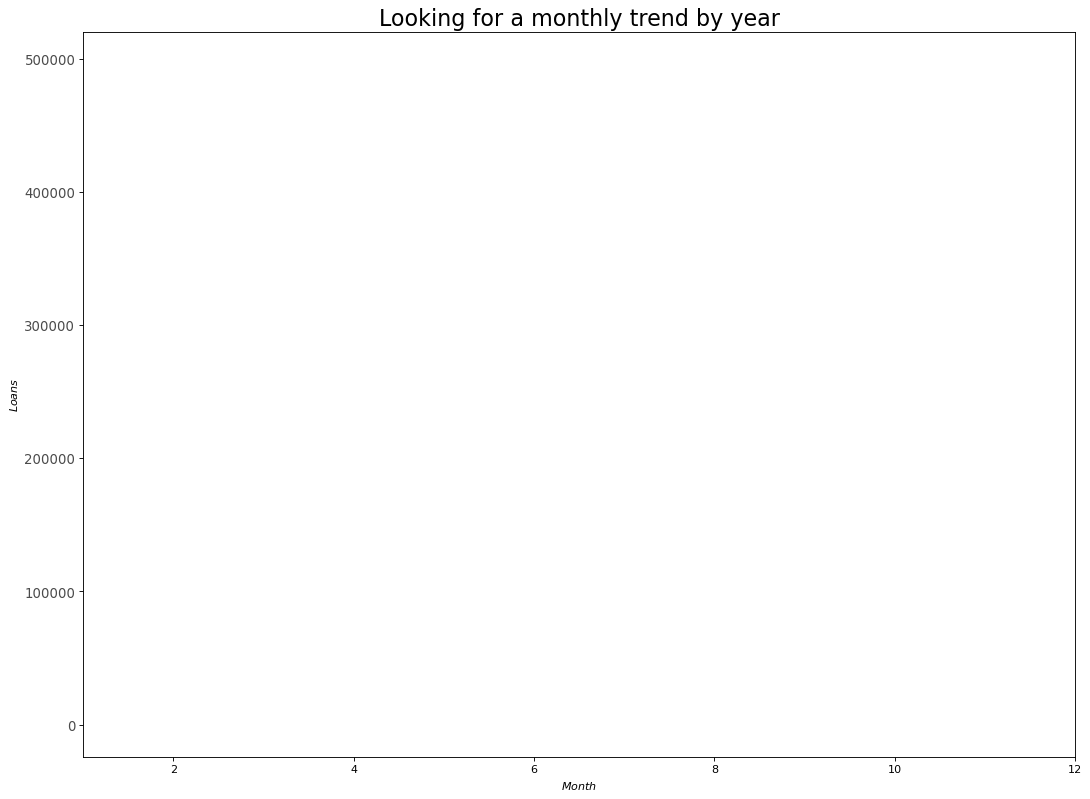

In [70]:
# Draw Plot
plt.pyplot.figure(figsize=(16,12), dpi= 80)

for i, y in enumerate(years):
    if i > 0:        
        plt.pyplot.plot('issue_month', 'id', data=acc_df.loc[acc_df.issue_year==y, :], color=mycolors[i], label=y)
        #plt.pyplot.text(acc_df.loc[acc_df.issue_year==y, 'issue_month'], i, y, fontsize=12, color=mycolors[i])
        
# Decoration
plt.pyplot.gca().set(xlim=(1, 12), ylabel='$Loans$', xlabel='$Month$')
plt.pyplot.yticks(fontsize=12, alpha=.7)
plt.pyplot.title("Looking for a monthly trend by year", fontsize=20)
#plt.pyplot.legend(years)
plt.pyplot.show() 

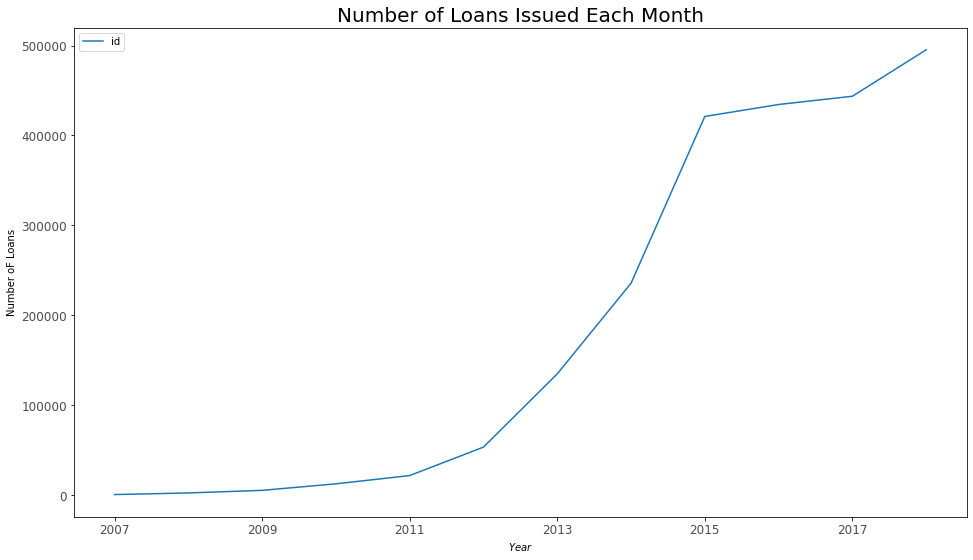

In [72]:
acc_df.plot('issue_year', 'id',figsize=(16,9))
        
# Decoration
plt.pyplot.gca().set(ylabel='Number oF Loans', xlabel='$Year$')
plt.pyplot.yticks(fontsize=12, alpha=.7)
plt.pyplot.xticks(fontsize=12, alpha=.7)
plt.pyplot.title("Number of Loans Issued Each Month", fontsize=20)
plt.pyplot.show()  

In [73]:
acc_df = accepted.groupby(['issue_year']).count()
acc_df.reset_index(inplace=True)

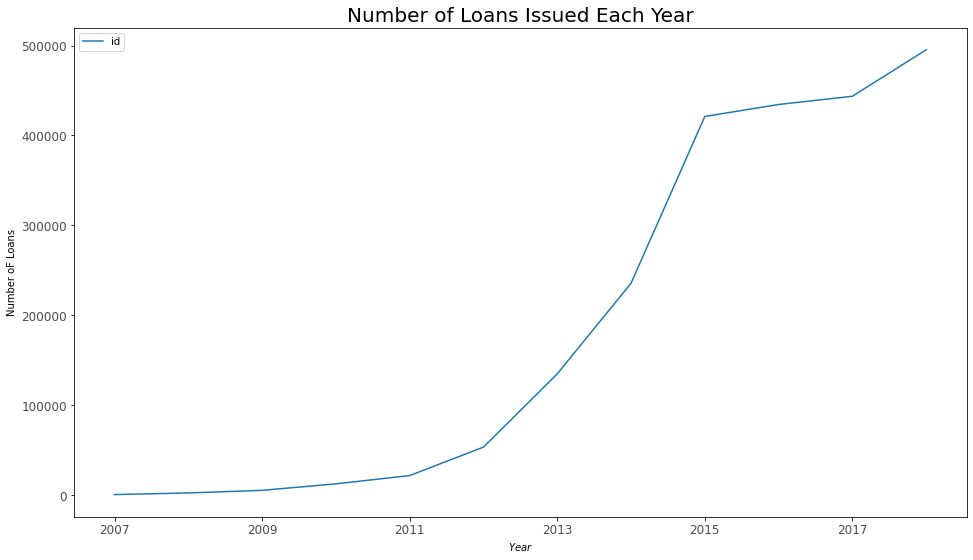

In [74]:
acc_df.plot('issue_year', 'id',figsize=(16,9))
        
# Decoration
plt.pyplot.gca().set(ylabel='Number oF Loans', xlabel='$Year$')
plt.pyplot.yticks(fontsize=12, alpha=.7)
plt.pyplot.xticks(fontsize=12, alpha=.7)
plt.pyplot.title("Number of Loans Issued Each Year", fontsize=20)
plt.pyplot.show()  